In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/meetpatel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
df = pd.read_csv("twitter_disaster (1).csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df['location'].fillna("Unknown",inplace=True)

In [7]:
df['keyword'].fillna(df['keyword'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [9]:
df['text'] = df['text'].fillna('')

In [10]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

In [12]:
df['target'] = df['target'].astype(int)

In [13]:
df

,id,keyword,location,text,target,clean_text
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
...,...,...,...,...,...,...
7608,10869,fatalities,Unknown,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...
7609,10870,fatalities,Unknown,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the out of control wild...
7610,10871,fatalities,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,s of volcano hawaii
7611,10872,fatalities,Unknown,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...


In [14]:
df.isnull().sum()

id            0
keyword       0
location      0
text          0
target        0
clean_text    0
dtype: int64

# 1 for disster 0 for non disaster

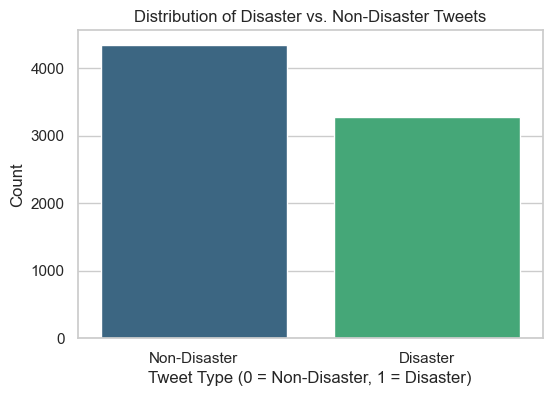

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')

# Add labels
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Type (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])

# Show plot
plt.show()


In [16]:
df['target'].value_counts()


target
0    4342
1    3271
Name: count, dtype: int64

In [17]:
df['tokens'] = df['clean_text'].apply(word_tokenize)


In [18]:
df[['clean_text','tokens']]

,clean_text,tokens
0,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...
7608,two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,ariaahrary thetawniest the out of control wild...,"[ariaahrary, thetawniest, the, out, of, contro..."
7610,s of volcano hawaii,"[s, of, volcano, hawaii]"
7611,police investigating after an ebike collided w...,"[police, investigating, after, an, ebike, coll..."


In [19]:
df

,id,keyword,location,text,target,clean_text,tokens
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...,...,...,...,...,...
7608,10869,fatalities,Unknown,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,10870,fatalities,Unknown,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the out of control wild...,"[ariaahrary, thetawniest, the, out, of, contro..."
7610,10871,fatalities,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,s of volcano hawaii,"[s, of, volcano, hawaii]"
7611,10872,fatalities,Unknown,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...,"[police, investigating, after, an, ebike, coll..."


# Analyze Word Frequency

## For Disaster 

In [20]:
disaster_df = df[df['target'] == 1]
all_disaster_text = ' '.join(disaster_df['clean_text'])

In [21]:
from collections import Counter
disaster_words = all_disaster_text.split()


In [22]:
word_freq = Counter(disaster_words)

In [23]:
word_freq

Counter({'the': 1357,
         'in': 1159,
         'a': 925,
         'of': 922,
         'to': 757,
         'and': 501,
         'on': 417,
         'for': 399,
         'is': 349,
         'at': 305,
         'i': 294,
         'by': 275,
         'from': 244,
         'with': 192,
         'that': 185,
         'this': 181,
         'after': 181,
         'fire': 178,
         'it': 176,
         'was': 168,
         'as': 167,
         'are': 166,
         'have': 142,
         'news': 136,
         'my': 131,
         'you': 129,
         'over': 127,
         'up': 126,
         'more': 122,
         'via': 121,
         'an': 119,
         'were': 119,
         'disaster': 117,
         'be': 114,
         'california': 111,
         'suicide': 110,
         'no': 108,
         'police': 107,
         'amp': 106,
         'people': 105,
         'has': 104,
         'who': 100,
         'but': 97,
         'when': 96,
         'been': 94,
         'not': 93,
         'killed':

In [24]:
# Top 20 most common words
top_words = word_freq.most_common(20)

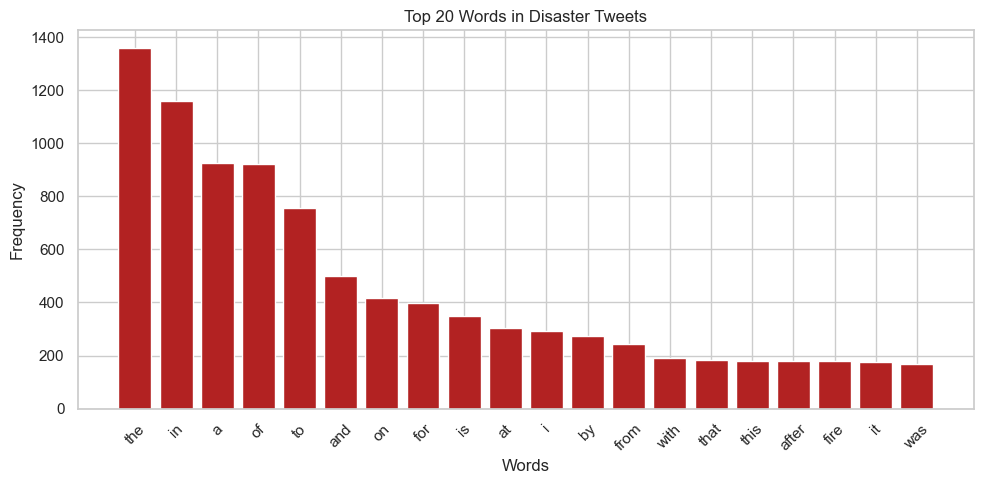

In [25]:
words, counts = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='firebrick')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Disaster Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## obseravtion :
1 The most frequent word is "the" (1350 times), which is expected as it's a common English stopword.

2 Other high-frequency words include "in," "a," "of," "to," and "and" — all of which are typical stopwords rather than domain-specific terms.

3 Toward the lower end of the list, you start seeing more context-relevant words like:"fire","after","this","was".


# for  Non_Disaster 

In [26]:
non_disaster_df = df[df['target'] == 0]
all_non_disaster_text = ' '.join(non_disaster_df['clean_text'])

In [27]:
from collections import Counter
non_disaster_words = all_non_disaster_text.split()

In [28]:
word_freq_non_dis = Counter(non_disaster_words)

In [29]:
top_w_d = word_freq_non_dis.most_common(20)

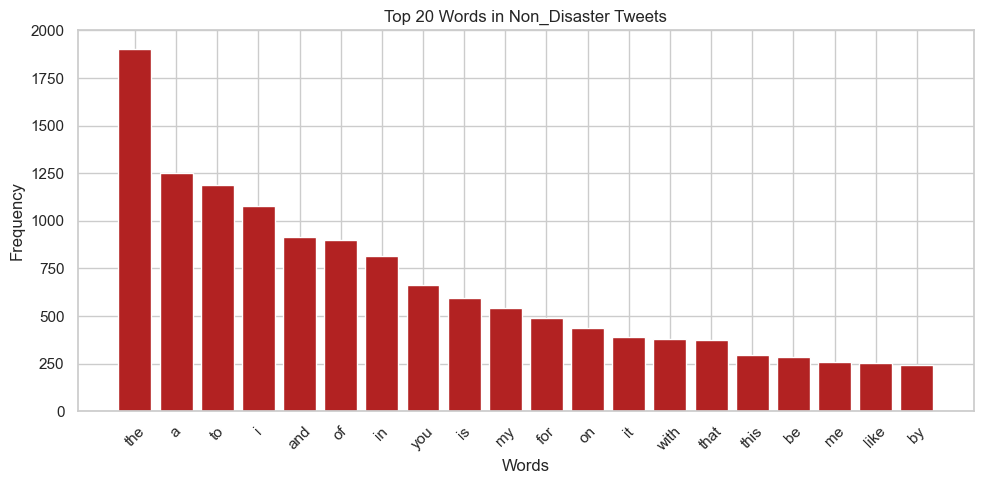

In [30]:
words, counts = zip(*top_w_d)

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='firebrick')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Non_Disaster Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## observation :
1 The word "the" is again the most frequent (~1900 times), which is typical in English texts.

2 Other high-frequency words are also general-purpose stopwords like:
    "a," "to," "i," "and," "of," "in," "you," "is"

3 Compared to the disaster tweet chart:
    Non-disaster tweets show more personal pronouns and casual words like
    "i" (appears very high on the list here, 4th position).
    
    "you," "my," "me," "like" — suggesting conversational or social content.
    
    Words like "fire" or "after" (which appeared in disaster tweets) are missing here, highlighting the thematic difference.


### -------------------------------------------------------------------------------------------------------------------------------

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text'])

y = df['target']


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [34]:
df

,id,keyword,location,text,target,clean_text,tokens
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...,...,...,...,...,...
7608,10869,fatalities,Unknown,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,10870,fatalities,Unknown,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the out of control wild...,"[ariaahrary, thetawniest, the, out, of, contro..."
7610,10871,fatalities,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,s of volcano hawaii,"[s, of, volcano, hawaii]"
7611,10872,fatalities,Unknown,Police investigating after an e-bike collided ...,1,police investigating after an ebike collided w...,"[police, investigating, after, an, ebike, coll..."


In [35]:
df['location'].value_counts()

location
Unknown                         2535
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3341, dtype: int64

# feuture engineering

### 1 .Word Frequencies 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer


bow = CountVectorizer(max_features=5000)  

X_bow = bow.fit_transform(df['clean_text'])

print("BoW shape:", X_bow.shape)

BoW shape: (7613, 5000)


### 2. TF-IDF Scores 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(df['clean_text'])

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (7613, 5000)


### 3. Sentiment Analysis

In [38]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply to dataframe
df[['sentiment_polarity', 'sentiment_subjectivity']] = df['clean_text'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

print(df[['clean_text', 'sentiment_polarity', 'sentiment_subjectivity']].head())

                                          clean_text  sentiment_polarity  \
0  our deeds are the reason of this earthquake ma...             0.00000   
1              forest fire near la ronge sask canada             0.10000   
2  all residents asked to shelter in place are be...            -0.01875   
3  people receive wildfires evacuation orders in ...             0.00000   
4  just got sent this photo from ruby alaska as s...             0.00000   

   sentiment_subjectivity  
0                  0.0000  
1                  0.4000  
2                  0.3875  
3                  0.0000  
4                  0.0000  


In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meetpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop_words = set(stopwords.words('english'))


In [41]:
def extract_text_features(text):
    words = text.split()
    num_words = len(words)
    num_unique_words = len(set(words))
    num_chars = len(text)
    num_stopwords = len([ w for w in words if w.lower() in stop_words])
    num_hashtags = len(re.findall(r'#\w+',text))
    num_mentions = len(re.findall(r'@\w+',text))
    num_url     =  len(re.findall(r'http[s]?://\S+',text))


    return pd.Series([num_words,num_unique_words,num_chars,num_stopwords,num_hashtags,num_mentions,num_url])
df[[
    'word_count',
    'unique_word_count',
    'char_count',
    'stopword_count',
    'hashtag_count',
    'mention_count',
    'url_count'
]] = df['text'].apply(extract_text_features)

In [42]:
import emoji
df['emoji_count'] = df['text'].apply(lambda x: len([c for c in x if c in emoji.EMOJI_DATA]))
sum(df["emoji_count"])

10

In [43]:
df['special_chars'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#') or x.startswith('@') or x.startswith('!')]))
df['special_chars'].sum()

6034

In [44]:
df.head(5)

,id,keyword,location,text,target,clean_text,tokens,sentiment_polarity,sentiment_subjectivity,word_count,unique_word_count,char_count,stopword_count,hashtag_count,mention_count,url_count,emoji_count,special_chars
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...",0.00000,0.0000,13,13,69,6,1,0,0,0,1
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",0.10000,0.4000,7,7,38,0,0,0,0,0,0
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...",-0.01875,0.3875,22,20,133,11,0,0,0,0,0
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...",0.00000,0.0000,8,8,65,1,1,0,0,0,1
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...",0.00000,0.0000,16,15,88,7,2,0,0,0,2


In [52]:
df = df[df['location'].notnull()]
df['location'] = df['location'].str.strip()
df = df[df['location'] != '']

In [54]:
location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'tweet_count']

print("Top 10 locations with most tweets:")
print(location_counts.head(10))

Top 10 locations with most tweets:
          location  tweet_count
0          Unknown         2536
1              USA          105
2         New York           73
3    United States           50
4           London           46
5          Nigeria           32
6           Canada           30
7               UK           27
8  Los Angeles, CA           26
9            India           24


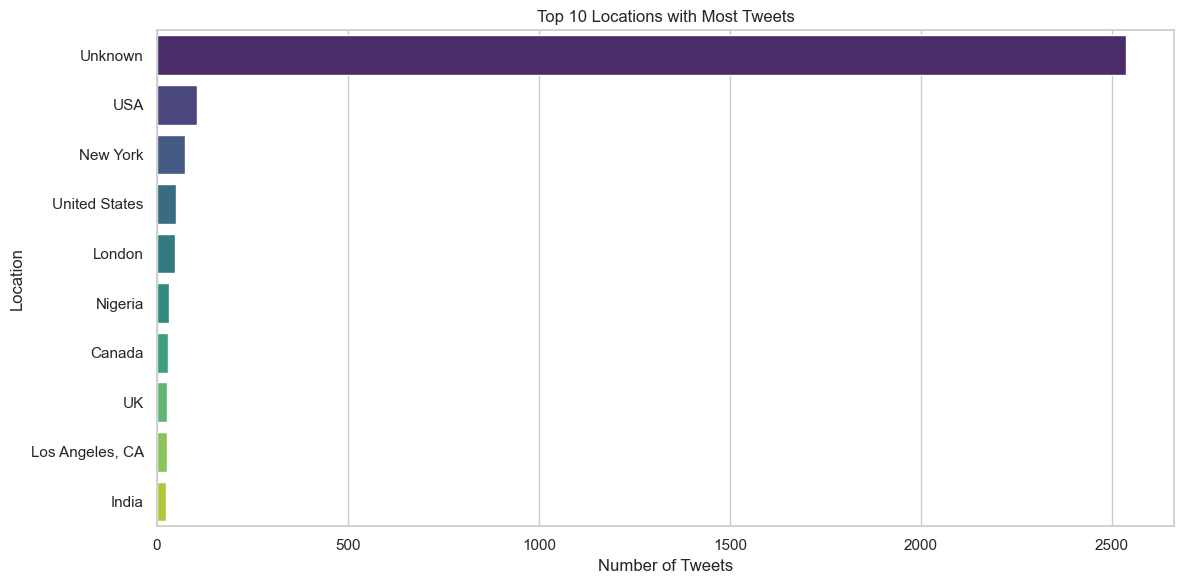

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='tweet_count', y='location', data=location_counts.head(10), palette='viridis')
plt.title('Top 10 Locations with Most Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

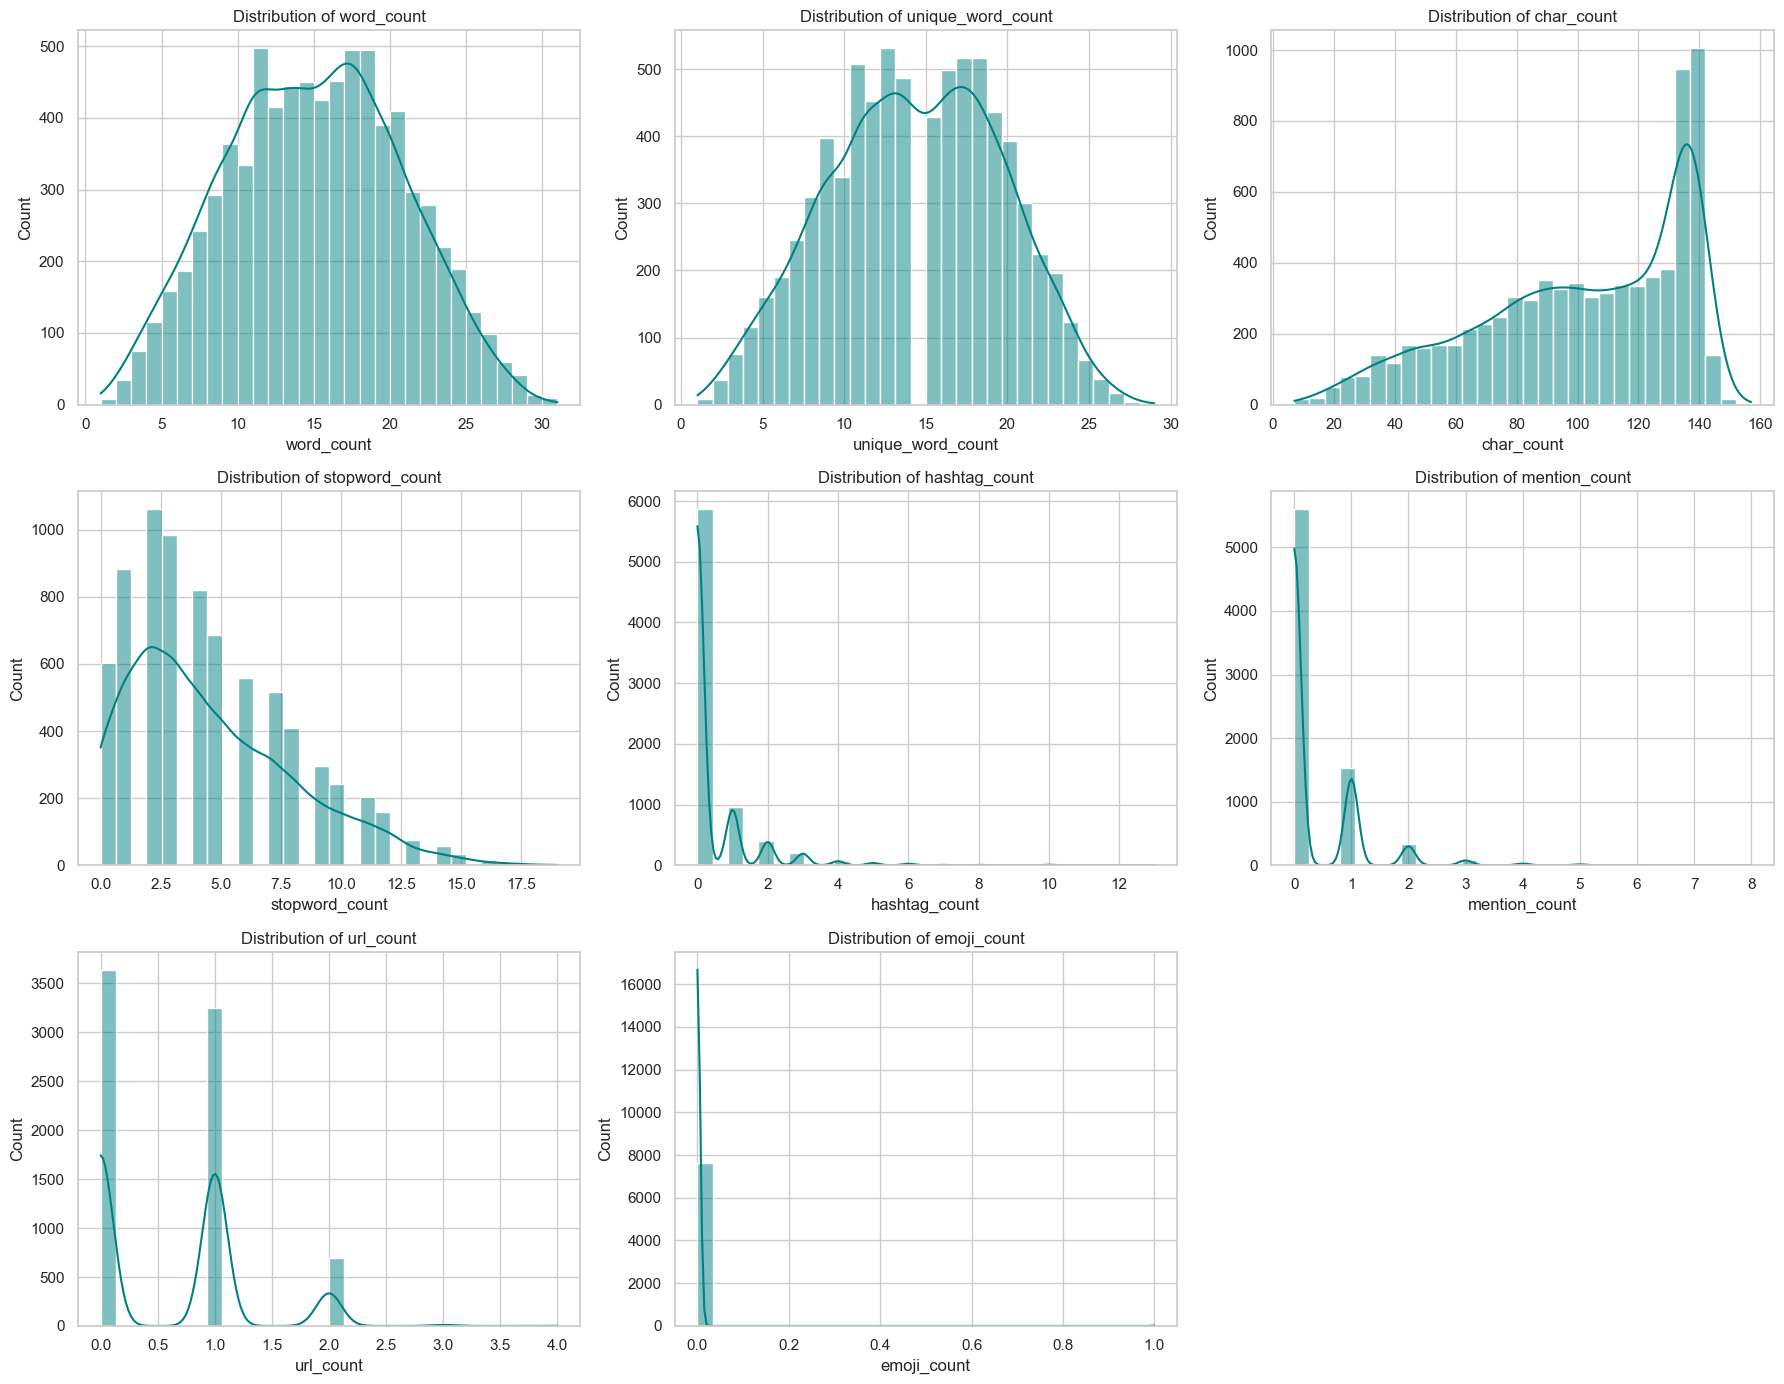

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [
    'word_count',
    'unique_word_count',
    'char_count',
    'stopword_count',
    'hashtag_count',
    'mention_count',
    'url_count',
    'emoji_count'
]

plt.figure(figsize=(18, 14))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

## obseravtion :
## 1 Word Count (word_count):

  Most tweets have between 10 and 20 words.

  The distribution is slightly right-skewed — some longer tweets, but most are short to medium in length.

## 2 Unique Word Count (unique_word_count):
  Similar shape to word count but slightly shifted left.

  Indicates that many tweets have some repetition of words (which is natural in social media posts).

## 3 Character Count (char_count):
  A large number of tweets cluster near 120-140 characters, likely close to Twitter’s character limit (originally 140 for tweets before it was raised to 280).

  A second, smaller cluster appears around 60-80 characters, representing shorter tweets.

## 4 Stopword Count (stopword_count):
  Most tweets have between 2 and 8 stopwords.

  A sharp drop-off beyond 10, which is logical since tweets are short and stopwords are filtered or minimal in some cases.

## 5 Hashtag Count (hashtag_count):
  The majority of tweets have 0 or 1 hashtag.

  A long tail exists for tweets containing multiple hashtags, though it’s less common.

## 6 Mention Count (mention_count):

  Most tweets have 0 or 1 mention (@username).

  A few tweets go as high as 4-7 mentions, likely retweets, shout-outs, or spam.

## 7 URL Count (url_count):

  Clear peaks at 0, 1, and 2 URLs.

  Tweets with links are quite frequent, especially with 1 URL, which could point to news sharing or resource links.

## 8 Emoji Count (emoji_count):

  Most tweets don’t contain emojis.

  When present, it’s rare to have more than one emoji per tweet.

In [46]:
df.head()

,id,keyword,location,text,target,clean_text,tokens,sentiment_polarity,sentiment_subjectivity,word_count,unique_word_count,char_count,stopword_count,hashtag_count,mention_count,url_count,emoji_count,special_chars
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...",0.00000,0.0000,13,13,69,6,1,0,0,0,1
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",0.10000,0.4000,7,7,38,0,0,0,0,0,0
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...",-0.01875,0.3875,22,20,133,11,0,0,0,0,0
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...",0.00000,0.0000,8,8,65,1,1,0,0,0,1
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...",0.00000,0.0000,16,15,88,7,2,0,0,0,2


In [47]:
df.to_csv('/Users/meetpatel/Desktop/project_7/process_data.csv')